In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import math
from scipy.stats import linregress
from sklearn import linear_model
import gmaps
# Import API key
from api_keys import g_key
#import rpy2.rinterface
#import rpy2.robjects as ro
#from rpy2.robjects.packages import importr
#base = importr('base')

In [2]:

low_memory=False
crime_141516_data=pd.read_csv(r"C:\Users\The Doctor\Documents\GitHub\ParksAndPotholes\Resources\crime_141516_filtered.csv")
crime_141516_data.head()







C:\Users\The Doctor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (12,15,16,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10602514,HZ354364,04/29/2016 12:00:00 PM,062XX N MOODY AVE,810,THEFT,OVER $500,RESIDENCE,False,False,...,39,10,06,1134229,1941104,2016,09/24/2019 04:27:56 PM,41.994596329,-87.781607675,"(41.994596329, -87.781607675)"
1,10567742,HZ315599,05/23/2016 12:00:00 PM,036XX N OKETO AVE,810,THEFT,OVER $500,RESIDENCE,False,False,...,38,17,06,1126112,1923306,2016,09/24/2019 04:27:56 PM,41.945896308,-87.811864837,"(41.945896308, -87.811864837)"
2,11835080,JC440236,08/16/2016 09:00:00 PM,038XX S DR MARTIN LUTHER KING JR DR,810,THEFT,OVER $500,NURSING HOME/RETIREMENT HOME,False,False,...,3,35,06,,,2016,09/23/2019 04:08:00 PM,,,
3,11569549,HZ387581,08/11/2016 12:15:00 PM,044XX W MONROE ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,RESIDENCE PORCH/HALLWAY,True,False,...,28,26,18,,,2016,09/14/2019 03:58:10 PM,,,
4,11569407,HZ436553,09/14/2016 09:00:00 PM,100XX W OHARE ST,2091,NARCOTICS,FORFEIT PROPERTY,AIRPORT/AIRCRAFT,True,False,...,41,76,18,,,2016,09/14/2019 03:58:10 PM,,,


In [3]:
low_memory=False
crime_14_data=pd.read_csv(r"C:\Users\The Doctor\Documents\GitHub\ParksAndPotholes\Resources\Crimes_2014_filtered.csv")
crim_de_15_data=pd.read_csv(r"C:\Users\The Doctor\Documents\GitHub\ParksAndPotholes\Resources\Crimes_2015_filtered.csv")
crime_16_data=pd.read_csv(r"C:\Users\The Doctor\Documents\GitHub\ParksAndPotholes\Resources\Crimes_2016_filtered.csv")
park_data=pd.read_csv(r"C:\Users\The Doctor\Documents\GitHub\ParksAndPotholes\Resources\cpd_parks_filtered.csv")
park_data.head()

C:\Users\The Doctor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,the_geom,PARK_NO,OBJECTID_1,PARK,LOCATION,ZIP,ACRES,WARD,PARK_CLASS,LABEL,...,V4572,V4573,V4574,V4575,V4576,V4577,V4578,V4579,V4580,V4581
0,MULTIPOLYGON (((-87.60615975027056 41.78725348...,21,19,WASHINGTON (GEORGE),5531 S DR MARTIN LUTHER KING J,60637,350.49,0,CITYWIDE PARK,Washington (George),...,,,,,,,,,,
1,MULTIPOLYGON (((-87.68232636987031 41.79339287...,22,20,GAGE (GEORGE),2415 W 55TH ST,60629,26.50,0,REGIONAL PARK,Gage,...,,,,,,,,,,
2,MULTIPOLYGON (((-87.79864707333931 41.92001134...,127,75,RUTHERFORD SAYRE,6871 W BELDEN AVE,60635,13.47,0,COMMUNITY PARK,Rutherford Sayre,...,,,,,,,,,,
3,MULTIPOLYGON (((-87.70607314161074 41.97419823...,186,101,RIVER,5100 N FRANCISCO AVE,60625,29.60,0,REGIONAL PARK,River,...,,,,,,,,,,
4,MULTIPOLYGON (((-87.705677687305 41.9829973651...,274,170,LEGION,3100 W BRYN MAWR AVE,60659,48.44,0,REGIONAL PARK,Legion,...,,,,,,,,,,


In [8]:
park_acres = park_data.groupby(['WARD'])



In [9]:
park_acres.head(10)

,the_geom,PARK_NO,OBJECTID_1,PARK,LOCATION,ZIP,ACRES,WARD,PARK_CLASS,LABEL,...,V4572,V4573,V4574,V4575,V4576,V4577,V4578,V4579,V4580,V4581
0,MULTIPOLYGON (((-87.60615975027056 41.78725348...,21,19,WASHINGTON (GEORGE),5531 S DR MARTIN LUTHER KING J,60637,350.49,0,CITYWIDE PARK,Washington (George),...,,,,,,,,,,
1,MULTIPOLYGON (((-87.68232636987031 41.79339287...,22,20,GAGE (GEORGE),2415 W 55TH ST,60629,26.50,0,REGIONAL PARK,Gage,...,,,,,,,,,,
2,MULTIPOLYGON (((-87.79864707333931 41.92001134...,127,75,RUTHERFORD SAYRE,6871 W BELDEN AVE,60635,13.47,0,COMMUNITY PARK,Rutherford Sayre,...,,,,,,,,,,
3,MULTIPOLYGON (((-87.70607314161074 41.97419823...,186,101,RIVER,5100 N FRANCISCO AVE,60625,29.60,0,REGIONAL PARK,River,...,,,,,,,,,,
4,MULTIPOLYGON (((-87.705677687305 41.9829973651...,274,170,LEGION,3100 W BRYN MAWR AVE,60659,48.44,0,REGIONAL PARK,Legion,...,,,,,,,,,,
5,MULTIPOLYGON (((-87.70377387493151 41.97204199...,275,171,RONAN (GEORGE),3000 W ARGYLE ST,60625,11.97,0,LINEAR PARK,Ronan,...,,,,,,,,,,
6,MULTIPOLYGON (((-87.76684515424051 41.78402358...,307,192,MINUTEMAN,5940 S CENTRAL AVE,60638,8.97,0,COMMUNITY PARK,Minuteman,...,,,,,,,,,,
7,MULTIPOLYGON (((-87.79552666947643 41.78473801...,371,234,VALLEY FORGE,7001 W 59TH ST,60638,8.32,0,COMMUNITY PARK,Valley Forge,...,,,,,,,,,,
8,MULTIPOLYGON (((-87.65541306306196 41.75057460...,509,337,RENAISSANCE,1300 W 79TH ST,60620,1.28,0,PASSIVE PARK,Renaissance,...,,,,,,,,,,
9,MULTIPOLYGON (((-87.64195763007363 41.89311129...,511,339,WARD (A. MONTGOMERY),630 N KINGSBURY AVE,60610,2.92,0,NEIGHBORHOOD PARK,Montgomery Ward,...,,,,,,,,,,


In [18]:
# Get the sum of acres per war
park_data.groupby('WARD')['ACRES'].sum()

WARD
0      804.820000
1       13.600000
2       23.360000
3       77.050000
4      207.140000
5      732.280000
6       52.780000
7      161.560000
8      121.590000
9      136.620000
10    1010.370000
11      67.060000
12     106.880000
13      86.430000
14      63.460000
15      14.470000
16      22.530000
17     389.070000
18      79.510000
19     140.820000
20      88.380000
21      89.670000
22      51.870000
23       6.950000
24      25.190000
25      65.740000
26     236.140000
27      64.637000
28      41.220000
29     168.220000
30      79.970000
31      25.480000
32      33.390000
33      81.580000
34      87.085113
35       9.900000
36      16.540000
37      38.150000
38     102.380000
39     171.032277
40      73.450000
41      76.360000
42      20.470000
43      23.450000
44       3.790000
45      43.050000
46      19.740000
47      52.200000
48      18.800000
49      80.160000
50     146.620000
Name: ACRES, dtype: float64

In [21]:
park_acres_ward_sum=park_data.groupby('WARD')[['ACRES']].sum()
park_acres_ward_sum

,ACRES
WARD,
0,804.820000
1,13.600000
2,23.360000
3,77.050000
4,207.140000
5,732.280000
6,52.780000
7,161.560000
8,121.590000


In [61]:
park_acres_ward_sum_indexed = park_acres_ward_sum.reset_index()
park_acres_ward_sum_indexed
park_acres_ward_sum_indexed.drop([0])

,WARD,ACRES
1,1,13.600000
2,2,23.360000
3,3,77.050000
4,4,207.140000
5,5,732.280000
6,6,52.780000
7,7,161.560000
8,8,121.590000
9,9,136.620000
10,10,1010.370000


In [62]:
# Set x axis and tick locations
x_axis = np.arange(len(park_acres_ward_sum_indexed))
tick_locations = [value+0.4 for value in x_axis]

In [66]:
#need to rename WARD to ward
park_acres_ward_sum_indexed.columns = ['Ward', 'Acres']
park_acres_ward_sum_indexed
park_acres_ward_sum_indexed2=park_acres_ward_sum_indexed.drop([0])
park_acres_ward_sum_indexed2

,Ward,Acres
1,1,13.600000
2,2,23.360000
3,3,77.050000
4,4,207.140000
5,5,732.280000
6,6,52.780000
7,7,161.560000
8,8,121.590000
9,9,136.620000
10,10,1010.370000


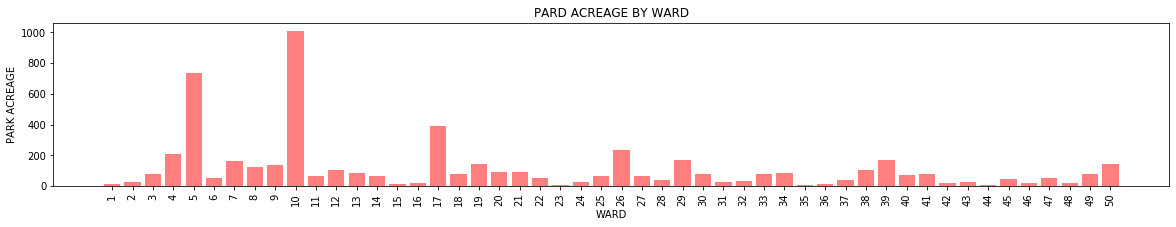

In [79]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, park_acres_ward_sum_indexed2["Acres"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, park_acres_ward_sum_indexed2["Ward"], rotation="vertical")
# Set a Title and labels
plt.title("PARD ACREAGE BY WARD")
plt.xlabel("WARD")
plt.ylabel("PARK ACREAGE")
#plt.show()
plt.savefig("acre_ward.png")

In [45]:
#OK dataframeize 2016 crime
crime_16_data_count=crime_16_data.groupby('Ward')[['Primary Type']].count()


In [46]:
crime_16_data_count

,Primary Type
Ward,
1,3638
2,7651
3,4628
4,3287
5,3754
6,5477
7,4396
8,4562
9,4442


In [48]:
crime_16_data_count_indexed = crime_16_data_count.reset_index()
crime_16_data_count_indexed

,Ward,Primary Type
0,1,3638
1,2,7651
2,3,4628
3,4,3287
4,5,3754
5,6,5477
6,7,4396
7,8,4562
8,9,4442
9,10,3046


In [68]:
#merging datasets by ward
merge_pc_2016 = pd.merge(crime_16_data_count_indexed, park_acres_ward_sum_indexed2, on="Ward")
merge_pc_2016

,Ward,Primary Type,Acres
0,1,3638,13.600000
1,2,7651,23.360000
2,3,4628,77.050000
3,4,3287,207.140000
4,5,3754,732.280000
5,6,5477,52.780000
6,7,4396,161.560000
7,8,4562,121.590000
8,9,4442,136.620000
9,10,3046,1010.370000


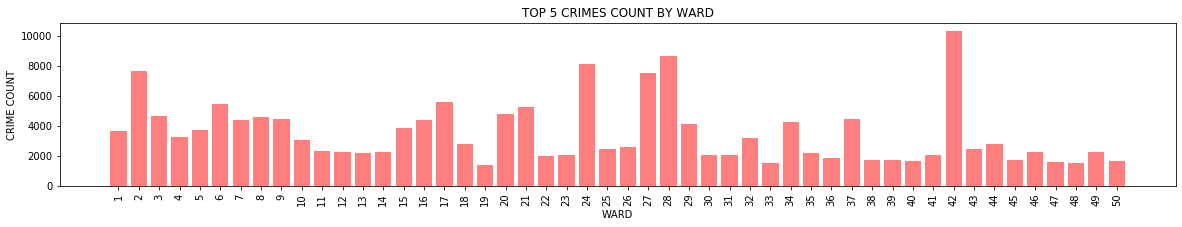

In [80]:
#plot crimes by ward
# Set x axis and tick locations
x_axis = np.arange(len(crime_16_data_count_indexed))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, crime_16_data_count_indexed["Primary Type"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, crime_16_data_count_indexed["Ward"], rotation="vertical")
# Set a Title and labels
plt.title("TOP 5 CRIMES COUNT BY WARD")
plt.xlabel("WARD")
plt.ylabel("CRIME COUNT")
plt.savefig("Top5Crime.png")
#plt.show()

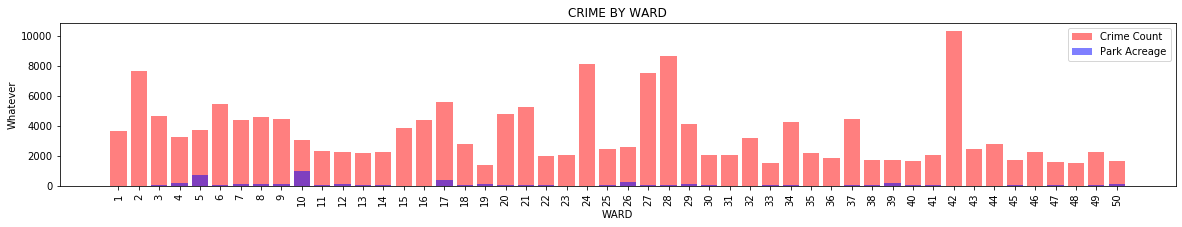

In [78]:
#grouped I'm just looking here, y axis is actually just a count 

# Set x axis and tick locations
x_axis = np.arange(len(merge_pc_2016))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, merge_pc_2016["Primary Type"], color='r', alpha=0.5, align="edge", label='Crime Count')
plt.bar(x_axis, merge_pc_2016["Acres"], color='b', alpha=0.5, align="edge", label='Park Acreage')

plt.xticks(tick_locations, merge_pc_2016["Ward"], rotation="vertical")

# Set a Title and labels
plt.title("CRIME BY WARD")
plt.xlabel("WARD")
plt.ylabel("Whatever")
plt.legend()
plt.show()
#well, that was pointless

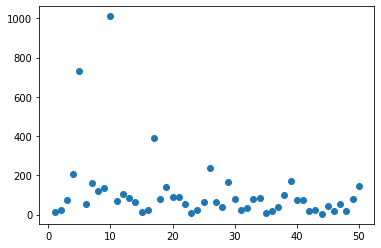

In [71]:
#go ahead and make a scatter. it won't help

plt.scatter(merge_pc_2016.Ward, merge_pc_2016.Acres)



In [72]:
#poisson regresssion
%matplotlib inline
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,
    Independence,Autoregressive)
from statsmodels.genmod.families import Poisson
